In [192]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

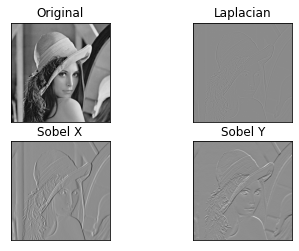

In [193]:
img = cv2.imread('lena.png',0)
laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.show()


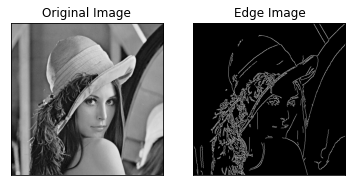

In [194]:
img = cv2.imread('lena.png',0)
edges = cv2.Canny(img,100,200)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()


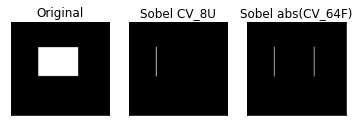

In [195]:
img = cv2.imread('PKk0v.png',0)
# Output dtype = cv2.CV_8U
sobelx8u = cv2.Sobel(img,cv2.CV_8U,1,0,ksize=5)
# Output dtype = cv2.CV_64F. Then take its absolute and convert to cv2.CV_8U
sobelx64f = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
abs_sobel64f = np.absolute(sobelx64f)
sobel_8u = np.uint8(abs_sobel64f)
plt.subplot(1,3,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(sobelx8u,cmap = 'gray')
plt.title('Sobel CV_8U'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(sobel_8u,cmap = 'gray')
plt.title('Sobel abs(CV_64F)'), plt.xticks([]), plt.yticks([])
plt.show()


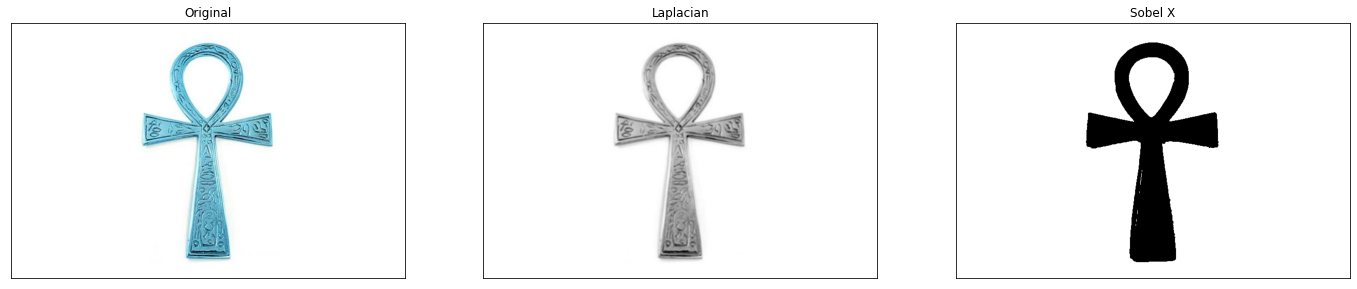

In [196]:
im = cv2.imread('The-Ankh.jpg')
imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
imgray = cv2.GaussianBlur(imgray,(5,5),0)

ret,thresh = cv2.threshold(imgray,245,255,0)
kernel = np.ones((5,5),np.uint8)
#erosion = cv2.erode(img,kernel,iterations = 1)
#dilation = cv2.dilate(img,kernel,iterations = 1)
#opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
#closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

#thresh = cv2.adaptiveThreshold(imgray,255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
plt.figure(figsize=(24,8))
plt.subplot(1,3,1),plt.imshow(im)
plt.title('Original'),plt.xticks([]),plt.yticks([])
plt.subplot(1,3,2),plt.imshow(imgray,cmap='gray')
plt.title('Laplacian'),plt.xticks([]),plt.yticks([])
plt.subplot(1,3,3),plt.imshow(thresh, cmap='gray')
plt.title('Sobel X'),plt.xticks([]),plt.yticks([])
plt.show()


In [197]:

contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
img0 = im.copy()
img1 = im.copy()
img0 = cv2.drawContours(img0, contours, 1, (255,0,0), 3)
img1 = cv2.drawContours(img1, contours, 3, (255,0,0), 3)

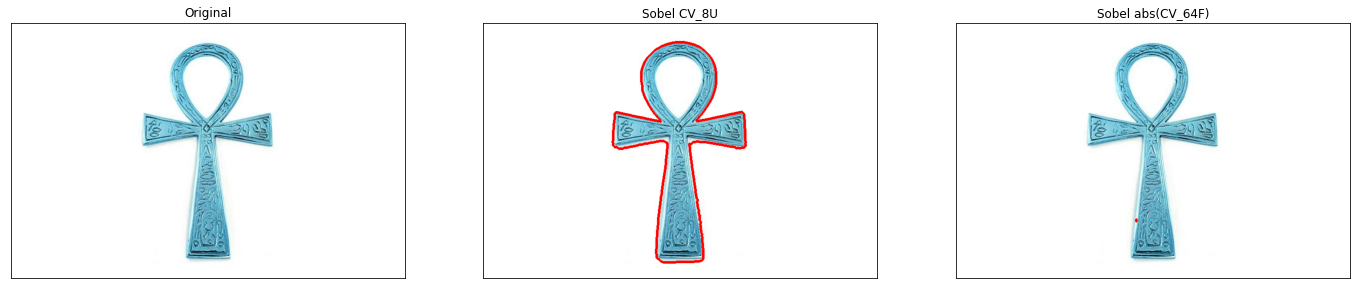

In [198]:
plt.figure(figsize=(24,8))
plt.subplot(1,3,1),plt.imshow(im)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(img0,cmap = 'gray')
plt.title('Sobel CV_8U'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(img1,cmap = 'gray')
plt.title('Sobel abs(CV_64F)'), plt.xticks([]), plt.yticks([])
plt.show()

In [199]:
print(len(contours))

9


In [200]:
print(contours[2].shape)

(2, 1, 2)


In [201]:
print(contours[1])

[[[374  40]]

 [[375  39]]

 [[394  39]]

 ...

 [[365  41]]

 [[368  41]]

 [[369  40]]]


In [202]:
cnt = contours[2]
M = cv2.moments(cnt)
print(M)
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])
img0 = cv2.rectangle(img0, (cx-2,cy-2),(cx+2,cy+2),(0,0,255),2)

{'m00': 0.0, 'm10': 0.0, 'm01': 0.0, 'm20': 0.0, 'm11': 0.0, 'm02': 0.0, 'm30': 0.0, 'm21': 0.0, 'm12': 0.0, 'm03': 0.0, 'mu20': 0.0, 'mu11': 0.0, 'mu02': 0.0, 'mu30': 0.0, 'mu21': 0.0, 'mu12': 0.0, 'mu03': 0.0, 'nu20': 0.0, 'nu11': 0.0, 'nu02': 0.0, 'nu30': 0.0, 'nu21': 0.0, 'nu12': 0.0, 'nu03': 0.0}


ZeroDivisionError: float division by zero

In [ ]:
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])
area = cv2.contourArea(cnt)
perimeter = cv2.arcLength(cnt,True)
epsilon = 0.1*cv2.arcLength(cnt,True)
approx = cv2.approxPolyDP(cnt,epsilon,True)

In [ ]:
print(approx)

[[[429 451]]

 [[430 450]]

 [[431 452]]

 [[430 453]]]


In [ ]:
print(area,perimeter)

4.0 7.656854152679443


In [ ]:
img0 = cv2.rectangle(img0, (cx-2,cy-2),(cx+2,cy+2),(0,0,255),2)
img1 = cv2.drawContours(img1, contours, 0, (255,0,0), 3)

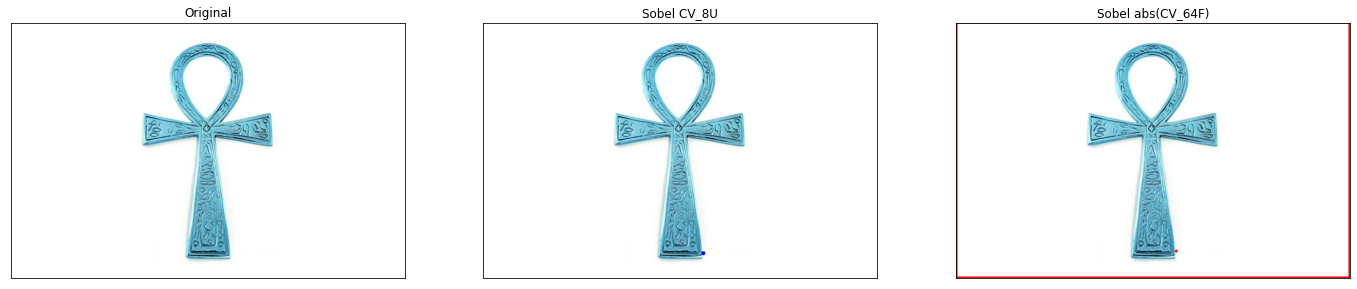

In [ ]:
plt.figure(figsize=(24,8))
plt.subplot(1,3,1),plt.imshow(im)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(img0,cmap = 'gray')
plt.title('Sobel CV_8U'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(img1,cmap = 'gray')
plt.title('Sobel abs(CV_64F)'), plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
size = []
for i in range(len(contours)):
    size.append((i,contours[2].shape[0]))

In [ ]:
print(size)

[(0, 6), (1, 6), (2, 6), (3, 6), (4, 6), (5, 6), (6, 6), (7, 6), (8, 6), (9, 6), (10, 6), (11, 6), (12, 6), (13, 6), (14, 6), (15, 6), (16, 6), (17, 6), (18, 6), (19, 6), (20, 6), (21, 6), (22, 6), (23, 6), (24, 6), (25, 6), (26, 6), (27, 6), (28, 6), (29, 6), (30, 6), (31, 6), (32, 6), (33, 6), (34, 6), (35, 6), (36, 6), (37, 6), (38, 6), (39, 6), (40, 6), (41, 6), (42, 6), (43, 6), (44, 6), (45, 6), (46, 6), (47, 6), (48, 6), (49, 6), (50, 6), (51, 6), (52, 6), (53, 6), (54, 6), (55, 6), (56, 6), (57, 6), (58, 6), (59, 6), (60, 6), (61, 6), (62, 6), (63, 6), (64, 6), (65, 6), (66, 6), (67, 6), (68, 6), (69, 6), (70, 6), (71, 6), (72, 6), (73, 6), (74, 6), (75, 6), (76, 6), (77, 6), (78, 6), (79, 6), (80, 6), (81, 6), (82, 6), (83, 6), (84, 6), (85, 6), (86, 6), (87, 6), (88, 6), (89, 6), (90, 6), (91, 6), (92, 6), (93, 6), (94, 6), (95, 6), (96, 6), (97, 6), (98, 6), (99, 6), (100, 6), (101, 6), (102, 6), (103, 6), (104, 6), (105, 6), (106, 6), (107, 6), (108, 6), (109, 6), (110, 6),